<a href="https://colab.research.google.com/github/hyyga/Deep-Learning-GSLC-1-/blob/main/GSLC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import File

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (9).zip to archive (9).zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile("archive (9).zip", "r") as zip_ref:
    zip_ref.extractall(".")

# Cek hasil ekstraksi
os.listdir()


['.config', 'hymenoptera_data', 'archive (9).zip', 'sample_data']

# Library

In [ ]:
# import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt

# Preprocess


In [ ]:
# menentukan lokasi dataset
train_dir = "hymenoptera_data/train"
val_dir = "hymenoptera_data/val"

# mmebuat dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32
)

class_names = val_ds.class_names

# Normalisasi
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


Found 245 files belonging to 2 classes.
Found 153 files belonging to 2 classes.


In [ ]:
''' data augmentation
menambah variasi gambar secara acak, bertujuan untuk menghindari overhitting dam memperkaya data pelatihan.'''
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data generatoe
datagen_train = ImageDataGenerator(
    samplewise_center=True,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
)

datagen_valid = ImageDataGenerator(samplewise_center=True)

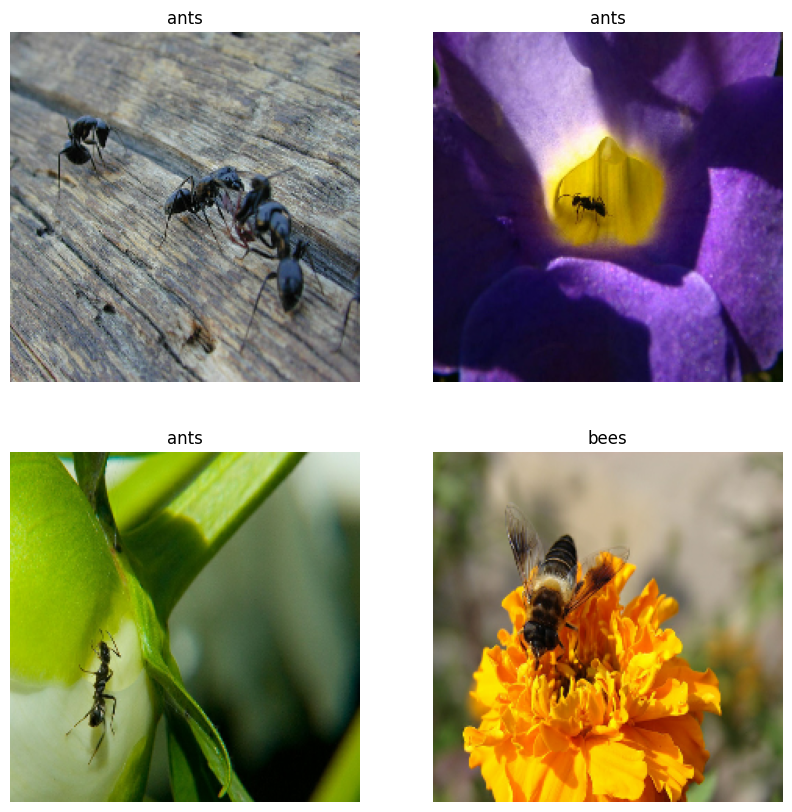

In [ ]:
# Memvisualisasi Dataset
plt.figure(figsize=(10, 10))
class_names = ['ants', 'bees']

for images, labels in train_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")


#CNN

In [ ]:
# CNN model
model_cnn = models.Sequential([
    layers.Input(shape=(224,224,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),

    layers.Dense(2, activation='softmax')
])

model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn = model_cnn.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.4275 - loss: 1.1739 - val_accuracy: 0.5425 - val_loss: 0.7666
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.5364 - loss: 0.7734 - val_accuracy: 0.5425 - val_loss: 0.7643
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.5551 - loss: 0.7791 - val_accuracy: 0.6275 - val_loss: 0.7388
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.6969 - loss: 0.6981 - val_accuracy: 0.6340 - val_loss: 0.7721
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.6724 - loss: 0.6468 - val_accuracy: 0.6275 - val_loss: 0.7152
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.7620 - loss: 0.5852 - val_accuracy: 0.5817 - val_loss: 0.7677
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.8184 - loss: 0.5224 - val_accuracy: 0.6667 - val_loss: 0.6909
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.7845 - loss: 0.5030 - val_accuracy: 0.6405 - val_loss: 0.8166
Epoch 9/

In [ ]:
# Classification Report
y_pred_probs = model_cnn.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.concatenate([y for x, y in val_ds], axis=0)

print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_names))

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step

=== Classification Report ===
              precision    recall  f1-score   support

        ants       0.45      0.59      0.51        70
        bees       0.53      0.40      0.46        83

    accuracy                           0.48       153
   macro avg       0.49      0.49      0.48       153
weighted avg       0.49      0.48      0.48       153



berdasarkan classification report, model hanya memiliki akurasi sebesar 48%.
model lebih baik dalam mmengenali ants dibandingkan bees. precision rendah di kedua kelas artinya masih banyak prediksi yang salah di kedua kelas. f1-score berada di sekitar 0.5 menandakan bahwa performa model cukup rendah, model belum belajar fitur yang dapat membedakan kedua kelas dengan baik.

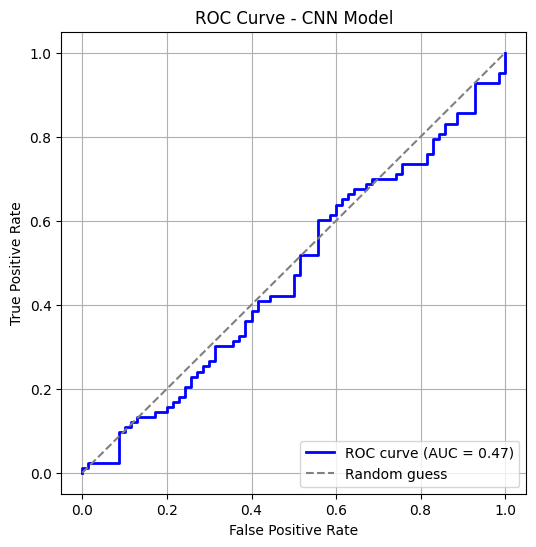

In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np
# ROC Curve & AUC
y_prob = y_pred_probs[:, 1]

# Menghitung ROC dan AUC
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CNN Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


ROC menggambarkan hubungan antara true positive rate dan false positive rate untuk berbagai threshold prediksi. AUC yang dihasilkan adalah 0.47 ini artinya lebih rendah dari tabakan acak. garis abu-abu menunjukan random guest, dan garis biru (garis ROC) harusnya berada di atas garis warna abu-abu. dan garis biru juga hampir mengikuti garis diagonal artinyaa model tidak bisa membedakan kelas ants dan bees dengan baik.

<Figure size 500x500 with 0 Axes>

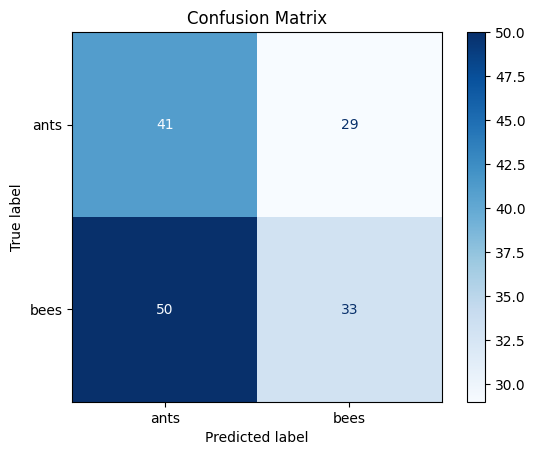

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(5,5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


confusion matrix menunjukan bahwa
TP: 41
TN: 33
FP: 50
FN: 29
ada 50 data yang terdeteksi sebagai false negatif, model salah belajar dan salah menebak jenis hewan.

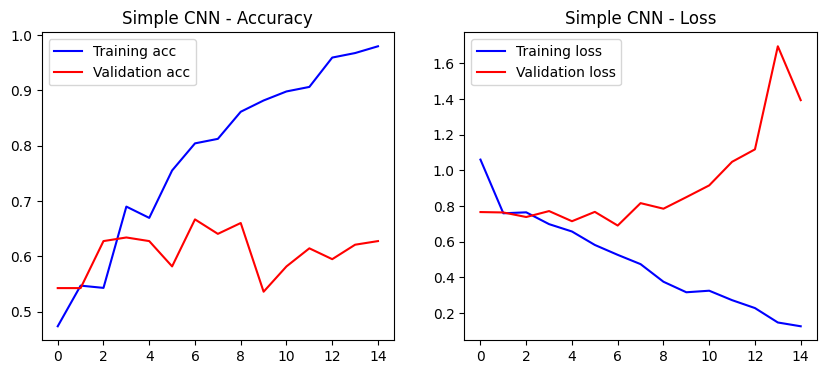

In [ ]:
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

plot_history(history_cnn, "Simple CNN")

berdasarkan hasil analysis di dapati bahwa, model CNN yang digunakan tidak belajar dengan baik. garis biru (training accuracy) terus meningkat dari 0.5 sampai 1, hal ini menandakan bahwa model sangat bagus dalam mentraining data. namun garis merah (validation accuracy) tidak stabil di 0.55 sampai 0.68 (naik turun). artinya model hanya mengahafal data (overhitting) dan gagal mengenali pla pada data baru.

pada grafik loss. garis biru (training loss) terus menurun hingga mendekati 0, artinya model semakin yakin dengan hasil data yang dilatih. namun garis merah (validation loss) malah semakin meningkat. artinya model semakin yakin terhadap prediksi-nya, namun sebenarnya presdiksinya salah. model tidak memiliki kemampuan untuk beradaptasi dengan data baru.

In [ ]:
# MobileNetV2
base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model_mobilenet = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model_mobilenet.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_mobilenet = model_mobilenet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# MobileNetV2 adalah model CNN pre-trained yang sudah dilatih di dataset besar ikagenet, sehingga sudah belajar banyak pola visual umum, model ini bisa dijadikan 'basis' untuk model baru yang punya dataset yang kecil.


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.5901 - loss: 0.8254 - val_accuracy: 0.8889 - val_loss: 0.2570
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9424 - loss: 0.1610 - val_accuracy: 0.8954 - val_loss: 0.2667
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9628 - loss: 0.0900 - val_accuracy: 0.9150 - val_loss: 0.2182
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9624 - loss: 0.0755 - val_accuracy: 0.8889 - val_loss: 0.2445
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9973 - loss: 0.0397 - val_accuracy: 0.9085 - val_loss: 0.2102
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9799 - loss: 0.0405 - val_accuracy: 0.9150 - val_loss: 0.2038
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9938 - loss: 0.0191 - val_accuracy: 0.9150 - val_loss: 0.2251
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 1.0000 - loss: 0.0175 - val_accuracy: 0.9216 - val_loss: 0.1981
Epoch 9/

In [ ]:
# Unfreeze sebagian layer
base_model.trainable = True

# Lock hanya layer awal
for layer in base_model.layers[:100]:
    layer.trainable = False

# Compile ulang
model_mobilenet.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

fine_tune_history = model_mobilenet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)


Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.9157 - loss: 0.2075 - val_accuracy: 0.9216 - val_loss: 0.2175
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.9302 - loss: 0.1487 - val_accuracy: 0.9150 - val_loss: 0.2158
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.9672 - loss: 0.0904 - val_accuracy: 0.9216 - val_loss: 0.2135
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9839 - loss: 0.0619 - val_accuracy: 0.9281 - val_loss: 0.2117
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.9874 - loss: 0.0695 - val_accuracy: 0.9281 - val_loss: 0.2102


In [ ]:
# Prediksi dan label aktual
y_pred_probs = model_mobilenet.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.concatenate([y for x, y in val_ds], axis=0)

# Classification Report
print("\n=== Classification Report (MobileNetV2) ===")
print(classification_report(y_true, y_pred, target_names=class_names))


4/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step

=== Classification Report (MobileNetV2) ===
              precision    recall  f1-score   support

        ants       0.46      0.47      0.47        70
        bees       0.55      0.54      0.55        83

    accuracy                           0.51       153
   macro avg       0.51      0.51      0.51       153
weighted avg       0.51      0.51      0.51       153



berdasarkan classification report, model hanya memiliki akurasi sebesar 51%, ini artinya model hanya sedikit lebih baik di bandingkan tebakan acak. model ini lebih baik dalam mengenal bees dibandingkan dengan ants. precision rendah di kedua kelas artinya masih banyak prediksi yang masih salah. f1-score berada di antara 0.47 (ants) dan 0.55 (bees) menandakan bahwa performa model cukup rendah, model belum belajar fitur yang dapat membedakan kedua kelas dengan baik.

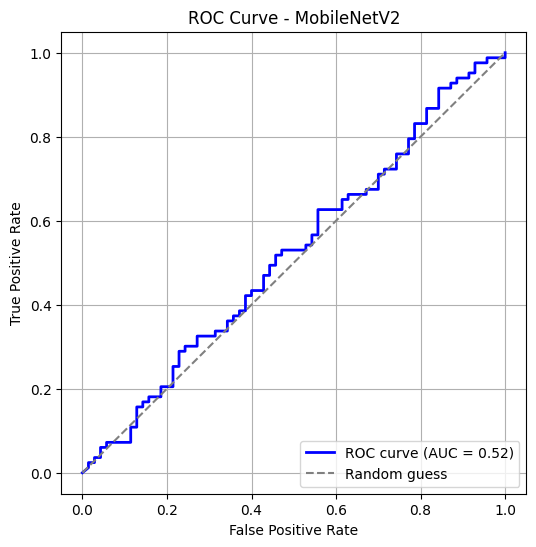

In [ ]:
# ROC Curve & AUC
# Gunakan probabilitas kelas positif (misalnya index 1)
y_prob = y_pred_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MobileNetV2')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

ROC menggambarkan hubungan antara true positive rate dan false positive rate untuk berbagai threshold prediksi. AUC yang dihasilkan adalah 0.52 ini artinya sedikit lebih tinggi dibandingkan tebakan acak. garis biru masih hampir segaris dengan garis abu-abu, menandakan prediksinya hampir sama dengan tebakan acak.

<Figure size 500x500 with 0 Axes>

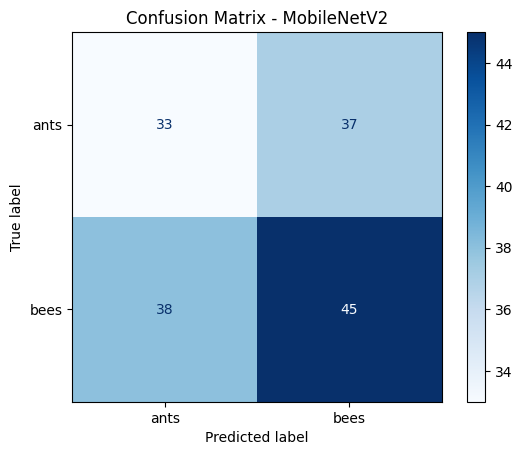

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(5,5))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - MobileNetV2')
plt.show()


confusion matrix menunjukan bahwa
TP: 33
TN: 45
FP: 38
FN: 37
ada 37 data yang terdeteksi sebagai false negatif, model salah belajar dan salah menebak jenis hewan.

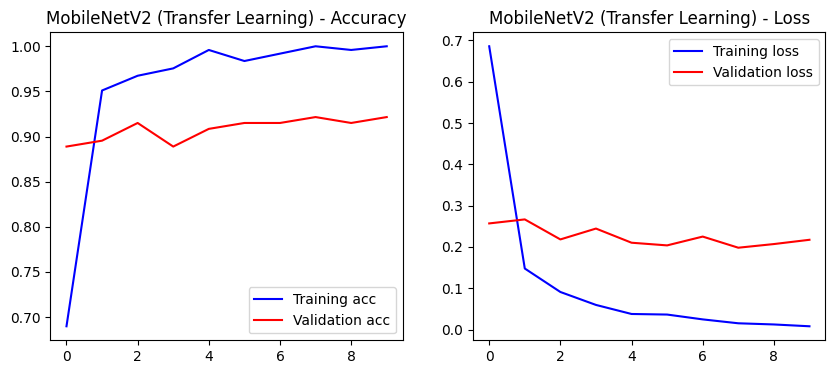

In [ ]:
plot_history(history_mobilenet, "MobileNetV2 (Transfer Learning)")

berdasarkan graf yang dihasilkan, didapati bahwa model ini juga tidak belajar dengan baik.

pada graf akurasi garis biru (training accuracy) kenaikan nya sangat drastis dari 0.70 bisa melonjak ke 0.95 (hingga 1) artinya model benar benar menghafal. garis merah (validation accuracy) berada di antara 0.89 sampai 0.93, cenderung tidak ada peningkatan seiring dengan bertambahnya epoch. hal ini menandakan bahwa model tidak belajar secara general dan hanya menghafal model, sehingga tidak bisa memprediksi model baru.

graf loss
garis biru (training loss) mengalami penurunan dari 0.7 sampai mendekati hal ini menandakan bahwa model semakin baik dalam mempelajari data, model mampu meminimalkan error. dan garis merah (validationloss) berada di kisaran 0.23 sampai 0.28. menandakan bahwa kemampuan model dalam menggeneralisasi ke data baru tidak meningkat secara signifikan. hal ini menjadi tanda bahwa model overhitting.

# kesimpulan
model yang dilatih overhitting sehingga hasil prediksi yang di dapatkan kurang maksimal. model hanya menghafal data training dan tidak bisa memprediksi model baru. meskipun begitu model CNN menggunakan MobileNet dapat dikatakan sedikit lebih baik dibandingkan dengan menggunakna model CNN biasa. karena mobilenet memiliki akurasi yang lebih tinggi (51% > 48%), jika dibandingkan berdasarkan ROC curve-nya modeldengan MobileNet juga lebih unggul dalam memprediksi (ROC: 0.52 > 0.47). false negaif pada model mobileNet juga lebih sedikit dibandingkan model CNN biasa.  namun perlu di ingat lagi bahwa model MobileNet ini tidak dapat dikatakan bagus. model masiih overfitting hanya saja tidak separah CNN biasa. overhitting ini dapat terjadi karena beberapa hal, salah satunya dikarenakan dataset yang kecil